In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 96.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('output.csv')
df

,start_station_name,date,time,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),busyness
0,2 Ave & 39 St,10-31,16:00:00,9.9,0.0,7.7,Not Busy
1,20 Ave & 21 St,10-31,16:00:00,9.9,0.0,7.7,Not Busy
2,111 St & 49 Ave,10-31,16:00:00,9.9,0.0,7.7,Not Busy
3,17 St & 5 Ave,10-31,16:00:00,9.9,0.0,7.7,Not Busy
4,14 St & 5 Ave,10-31,16:00:00,9.9,0.0,7.7,Not Busy
...,...,...,...,...,...,...,...
2032974,W 22 St & 10 Ave,10-21,04:00:00,14.3,0.0,3.2,Busy
2032975,Lafayette St & E 8 St,10-21,04:00:00,14.3,0.0,3.2,Busy
2032976,11 Ave & W 41 St,10-21,04:00:00,14.3,0.0,3.2,Busy
2032977,1 Ave & E 18 St,10-21,04:00:00,14.3,0.0,3.2,Busy


In [ ]:
df.isnull().sum()

,0
start_station_name,0
date,0
time,0
temperature_2m (°C),0
rain (mm),0
wind_speed_10m (km/h),0
busyness,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
busyness_mapping = {
    'Too Busy': 5,
    'Very Busy': 4,
    'Busy': 3,
    'Not Too Busy': 2,
    'Not Busy': 1
}
df['busyness_encoded'] = df['busyness'].map(busyness_mapping)

In [ ]:
df['time_seconds'] = pd.to_timedelta(df['time']).dt.total_seconds()

In [ ]:
df['date_ordinal'] = pd.to_datetime(df['date'], format='%m-%d').map(pd.Timestamp.toordinal)

In [ ]:
df['day_of_week'] = pd.to_datetime(df['date'] + '-2023', format='%m-%d-%Y').dt.weekday
df['day_of_week'] = df['day_of_week'].apply(lambda x: x + 2 if x < 6 else 1)

In [ ]:
df[['day_of_week', 'date_ordinal','time_seconds','temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)', 'busyness_encoded']].corr()

,day_of_week,date_ordinal,time_seconds,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),busyness_encoded
day_of_week,1.000000,0.078060,0.002407,-0.008820,0.001072,-0.192314,0.017001
date_ordinal,0.078060,1.000000,0.003021,-0.664654,0.041352,0.055155,-0.089534
time_seconds,0.002407,0.003021,1.000000,0.292086,-0.036743,0.141625,0.114661
temperature_2m (°C),-0.008820,-0.664654,0.292086,1.000000,0.096832,0.108311,0.112453
rain (mm),0.001072,0.041352,-0.036743,0.096832,1.000000,0.265870,-0.034849
wind_speed_10m (km/h),-0.192314,0.055155,0.141625,0.108311,0.265870,1.000000,0.002325
busyness_encoded,0.017001,-0.089534,0.114661,0.112453,-0.034849,0.002325,1.000000


In [ ]:
df2=pd.read_csv('202311-citibike-tripdata_3.csv')
df4=pd.read_csv('202312-citibike-tripdata_2.csv')
df5=pd.read_csv('202312-citibike-tripdata_3.csv')
df6=pd.read_csv('202310-citibike-tripdata_1.csv')
df7=pd.read_csv('202310-citibike-tripdata_2.csv')

<ipython-input-10-db454f3bb9fb>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('202311-citibike-tripdata_3.csv')
<ipython-input-10-db454f3bb9fb>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df4=pd.read_csv('202312-citibike-tripdata_2.csv')
<ipython-input-10-db454f3bb9fb>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df5=pd.read_csv('202312-citibike-tripdata_3.csv')
<ipython-input-10-db454f3bb9fb>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df6=pd.read_csv('202310-citibike-tripdata_1.csv')
<ipython-input-10-db454f3bb9fb>:5: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df7=pd.read_csv('202310-citibike-tripdata_2.csv')


In [ ]:
df8=pd.read_csv('202310-citibike-tripdata_3.csv')
df9=pd.read_csv('202310-citibike-tripdata_4.csv')
df1=pd.read_csv('202311-citibike-tripdata_1.csv')
df3=pd.read_csv('202312-citibike-tripdata_1.csv')

<ipython-input-11-93c658527b6d>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df8=pd.read_csv('202310-citibike-tripdata_3.csv')
<ipython-input-11-93c658527b6d>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df9=pd.read_csv('202310-citibike-tripdata_4.csv')
<ipython-input-11-93c658527b6d>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('202311-citibike-tripdata_1.csv')
<ipython-input-11-93c658527b6d>:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('202312-citibike-tripdata_1.csv')


In [ ]:
combined_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

In [ ]:
combined_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7985075 entries, 0 to 823672
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 852.9+ MB


In [ ]:
combined_df.describe()

,start_lat,start_lng,end_lat,end_lng
count,7.985075e+06,7.985075e+06,7.980146e+06,7.980146e+06
mean,4.073896e+01,-7.397219e+01,4.073881e+01,-7.397233e+01
std,4.027064e-02,2.860226e-02,4.272966e-02,3.880395e-02
min,4.058913e+01,-7.403000e+01,0.000000e+00,-7.430000e+01
25%,4.071473e+01,-7.399234e+01,4.071474e+01,-7.399257e+01
50%,4.073813e+01,-7.397995e+01,4.073805e+01,-7.398014e+01
75%,4.076187e+01,-7.395580e+01,4.076158e+01,-7.395593e+01
max,4.088654e+01,-7.381466e+01,4.117000e+01,0.000000e+00


In [ ]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [ ]:
combined_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
len(combined_df)

7985075

In [ ]:
columns_to_drop = ['ride_id', 'rideable_type', 'started_at', 'ended_at',
                   'start_station_id', 'end_station_name', 'end_station_id',
                   'end_lat', 'end_lng', 'member_casual']
combined_df = combined_df.drop(columns=columns_to_drop)

In [ ]:
combined_df.isnull().sum()

,0
start_station_name,9993
start_lat,0
start_lng,0


In [ ]:
combined_df.drop_duplicates(inplace=True)

In [ ]:
combined_df

,start_station_name,start_lat,start_lng
0,Queens Plaza North & Crescent St,40.751107,-73.940873
1,Queens Plaza North & Crescent St,40.751233,-73.940472
2,E 128 St & Madison Ave,40.807560,-73.939182
3,W 82 St & Central Park West,40.782864,-73.971619
4,8 Ave & W 33 St,40.751657,-73.993607
...,...,...,...
823665,Vernon Blvd & 47 Rd,40.744929,-73.953472
823666,E 44 St & Lexington Ave,40.752544,-73.974970
823667,E 44 St & Lexington Ave,40.752531,-73.974678
823670,8 Ave & W 38 St,40.754646,-73.991850


In [ ]:
combined_df.sort_values(by='start_station_name', inplace=True)

In [ ]:
combined_df

,start_station_name,start_lat,start_lng
40562,1 Ave & E 110 St,40.792360,-73.938229
415872,1 Ave & E 110 St,40.792444,-73.938104
234992,1 Ave & E 110 St,40.792432,-73.938214
415870,1 Ave & E 110 St,40.792342,-73.938247
234991,1 Ave & E 110 St,40.792312,-73.938189
...,...,...,...
491335,NaN,40.750000,-73.860000
894880,NaN,40.790000,-73.920000
171743,NaN,40.800000,-73.980000
185576,NaN,40.800000,-73.920000


In [ ]:
combined_df.isnull().sum()

,0
start_station_name,241
start_lat,0
start_lng,0


In [ ]:
combined_df.dropna(inplace=True)

In [ ]:
combined_df

,start_station_name,start_lat,start_lng
40562,1 Ave & E 110 St,40.792360,-73.938229
415872,1 Ave & E 110 St,40.792444,-73.938104
234992,1 Ave & E 110 St,40.792432,-73.938214
415870,1 Ave & E 110 St,40.792342,-73.938247
234991,1 Ave & E 110 St,40.792312,-73.938189
...,...,...,...
5826,Yankee Ferry Terminal,40.687123,-74.016500
268607,Yankee Ferry Terminal,40.687140,-74.016533
560176,Yankee Ferry Terminal,40.687027,-74.016705
360115,Yankee Ferry Terminal,40.687101,-74.016641


In [ ]:
combined_df = combined_df.groupby('start_station_name').apply(lambda x: x.sample(1)).reset_index(drop=True)

<ipython-input-28-bf3287781d8d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  combined_df = combined_df.groupby('start_station_name').apply(lambda x: x.sample(1)).reset_index(drop=True)


In [ ]:
combined_df

,start_station_name,start_lat,start_lng
0,1 Ave & E 110 St,40.792456,-73.938214
1,1 Ave & E 16 St,40.732073,-73.981765
2,1 Ave & E 18 St,40.733890,-73.980476
3,1 Ave & E 30 St,40.741481,-73.975381
4,1 Ave & E 39 St,40.747133,-73.971175
...,...,...,...
2228,Wyckoff Ave & Stanhope St,40.703457,-73.917966
2229,Wyckoff St & 3 Ave,40.682802,-73.982635
2230,Wythe Ave & Metropolitan Ave,40.716994,-73.963223
2231,Wythe Ave & N 13 St,40.722759,-73.957105


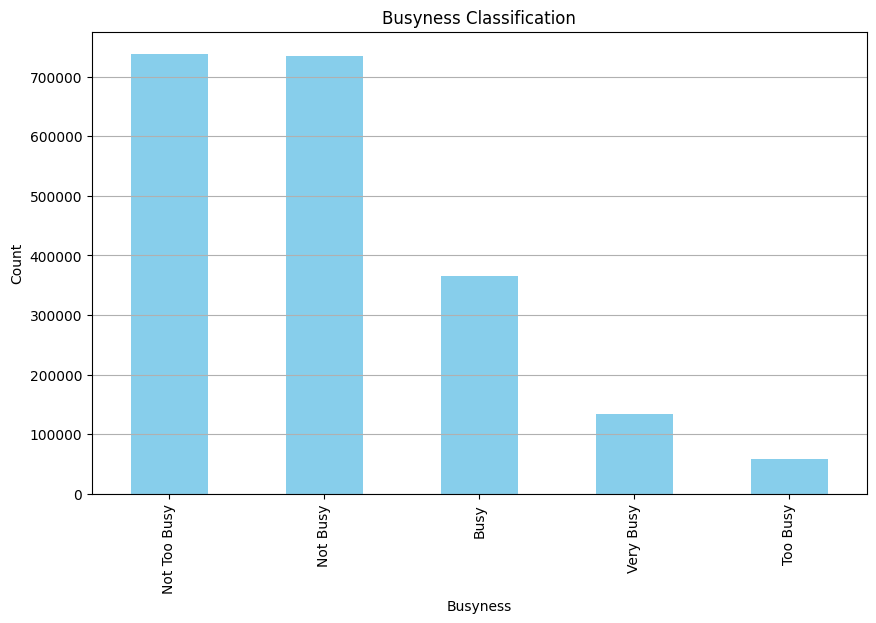

In [ ]:
import matplotlib.pyplot as plt

# Plot the data using matplotlib
plt.figure(figsize=(10, 6))
df['busyness'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Busyness')
plt.ylabel('Count')
plt.title('Busyness Classification')
plt.grid(axis='y')
plt.show()


In [ ]:
import dask.dataframe as dd

# Convert pandas DataFrames to Dask DataFrames
ddf1 = dd.from_pandas(df, npartitions=10)  # Adjust the number of partitions based on your memory
ddf2 = dd.from_pandas(combined_df, npartitions=10)

# Perform the merge operation with Dask
merged_ddf = dd.merge(ddf1, ddf2, on='start_station_name', how='left')

# Rename columns after merging
merged_ddf = merged_ddf.rename(columns={'start_lat': 'lat', 'start_lng': 'lng'})

# Compute the result and convert to pandas DataFrame if needed
merged_df = merged_ddf.compute()

merged_df


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,start_station_name,date,time,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),busyness,busyness_encoded,time_seconds,date_ordinal,day_of_week,lat,lng
0,Central Ave & Woodbine St,11-11,20:00:00,10.9,0.0,16.7,Not Busy,1,72000.0,693910,7,40.692887,-73.915952
1,Bus Slip & State St,11-11,20:00:00,10.9,0.0,16.7,Not Busy,1,72000.0,693910,7,40.701758,-74.013922
2,Church St & Worth St,11-11,20:00:00,10.9,0.0,16.7,Not Busy,1,72000.0,693910,7,40.716658,-74.006215
3,Amsterdam Ave & W 152 St,11-11,20:00:00,10.9,0.0,16.7,Not Busy,1,72000.0,693910,7,40.829402,-73.944366
4,30 Ave & 21 St,11-11,20:00:00,10.9,0.0,16.7,Not Busy,1,72000.0,693910,7,40.770423,-73.928683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202728,Hancock St & Bedford Ave,10-06,08:00:00,18.1,0.0,9.3,Not Too Busy,2,28800.0,693874,6,40.682127,-73.953860
202729,Huron St & Franklin St,10-06,08:00:00,18.1,0.0,9.3,Not Too Busy,2,28800.0,693874,6,40.732661,-73.958281
202730,Grand Concourse & E Mount Eden Ave,10-06,08:00:00,18.1,0.0,9.3,Not Too Busy,2,28800.0,693874,6,40.843145,-73.911749
202731,E 12 St & 3 Ave,10-06,08:00:00,18.1,0.0,9.3,Not Too Busy,2,28800.0,693874,6,40.732255,-73.988774


In [ ]:
df.describe()

,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),busyness_encoded,time_seconds,date_ordinal,day_of_week
count,2.032979e+06,2.032979e+06,2.032979e+06,2.032979e+06,2.032979e+06,2.032979e+06,2.032979e+06
mean,9.073706e+00,1.497294e-01,1.182149e+01,2.037242e+00,4.772234e+04,6.939132e+05,4.024571e+00
std,6.629751e+00,8.756843e-01,5.822468e+00,1.031576e+00,2.154858e+04,2.705094e+01,1.989302e+00
min,-5.800000e+00,0.000000e+00,4.000000e-01,1.000000e+00,0.000000e+00,6.938690e+05,1.000000e+00
25%,4.300000e+00,0.000000e+00,7.800000e+00,1.000000e+00,3.240000e+04,6.938890e+05,2.000000e+00
50%,8.700000e+00,0.000000e+00,1.080000e+01,2.000000e+00,5.040000e+04,6.939120e+05,4.000000e+00
75%,1.370000e+01,0.000000e+00,1.500000e+01,3.000000e+00,6.480000e+04,6.939370e+05,6.000000e+00
max,2.760000e+01,1.290000e+01,5.350000e+01,5.000000e+00,8.280000e+04,6.939600e+05,7.000000e+00


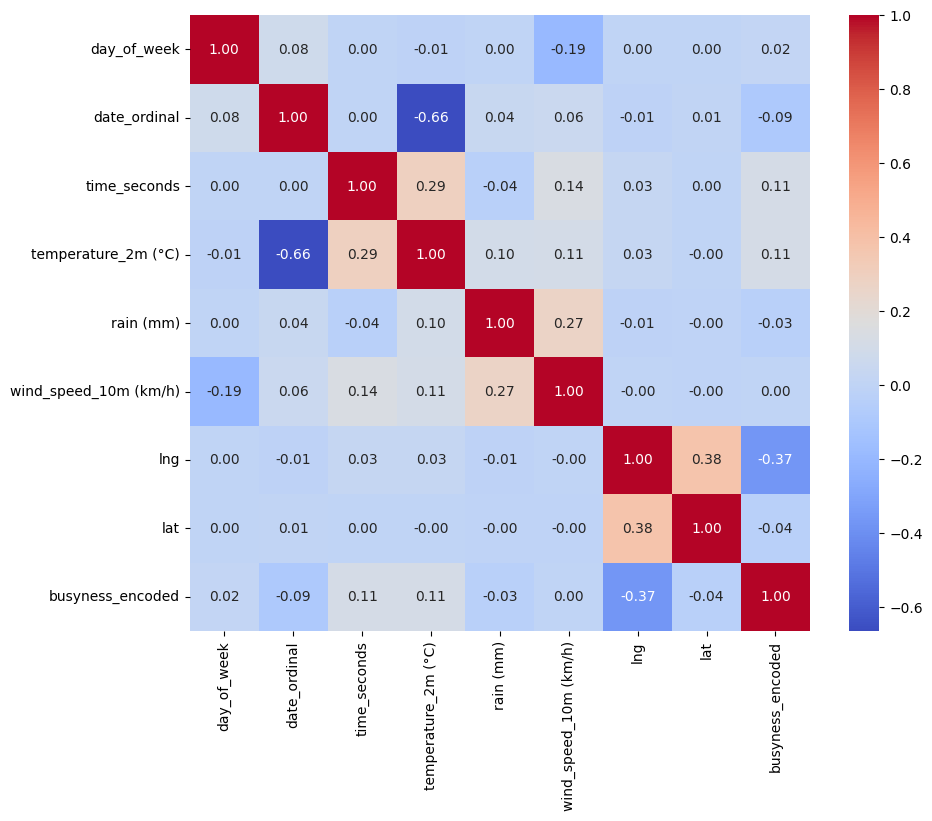

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap with correlation values
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size for better readability
sns.heatmap(
    merged_df[['day_of_week', 'date_ordinal', 'time_seconds', 'temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)', 'lng', 'lat', 'busyness_encoded']].corr(),
    annot=True,  # Add the correlation values on the heatmap
    fmt=".2f",   # Format the annotation text to two decimal places
    cmap="coolwarm",  # Optional: Choose a color map
    cbar=True  # Display the color bar
)

plt.show()

In [ ]:
# Reordering the columns
merged_df = merged_df[['start_station_name', 'date', 'time', 'temperature_2m (°C)', 'rain (mm)',
                       'wind_speed_10m (km/h)', 'lat', 'lng', 'busyness', 'busyness_encoded',
                       'time_seconds', 'date_ordinal', 'day_of_week']]

# Display the reordered DataFrame
merged_df.head()


,start_station_name,date,time,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),lat,lng,busyness,busyness_encoded,time_seconds,date_ordinal,day_of_week
0,Central Ave & Woodbine St,11-11,20:00:00,10.9,0.0,16.7,40.692887,-73.915952,Not Busy,1,72000.0,693910,7
1,Bus Slip & State St,11-11,20:00:00,10.9,0.0,16.7,40.701758,-74.013922,Not Busy,1,72000.0,693910,7
2,Church St & Worth St,11-11,20:00:00,10.9,0.0,16.7,40.716658,-74.006215,Not Busy,1,72000.0,693910,7
3,Amsterdam Ave & W 152 St,11-11,20:00:00,10.9,0.0,16.7,40.829402,-73.944366,Not Busy,1,72000.0,693910,7
4,30 Ave & 21 St,11-11,20:00:00,10.9,0.0,16.7,40.770423,-73.928683,Not Busy,1,72000.0,693910,7


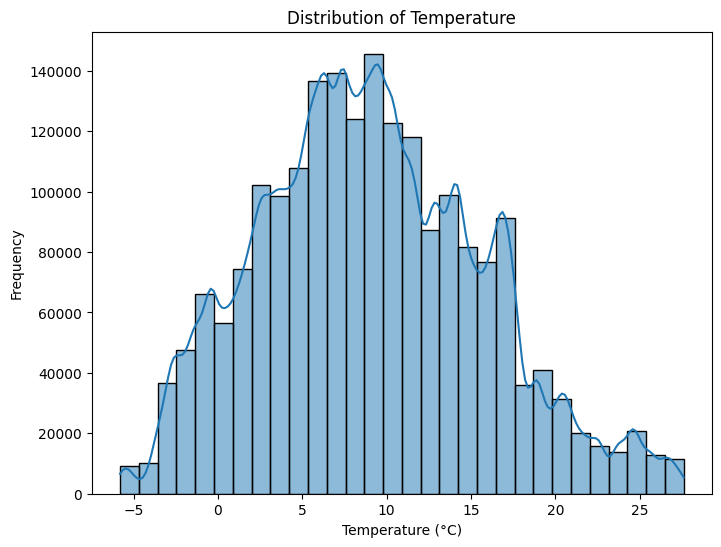

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['temperature_2m (°C)'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

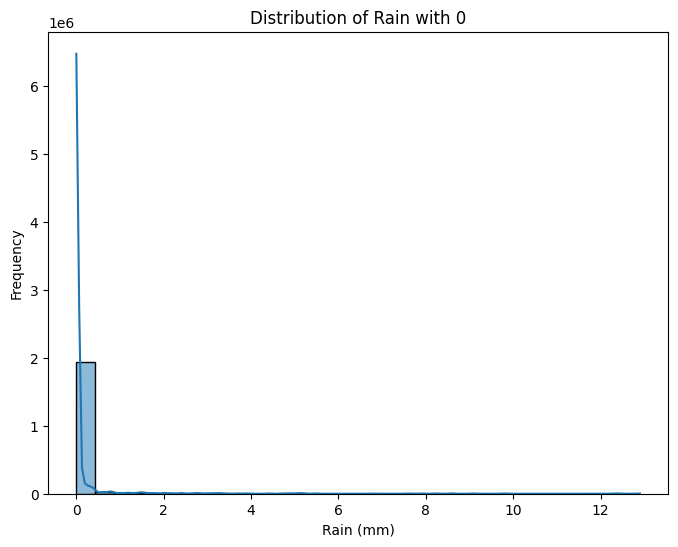

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rain (mm)'], bins=30, kde=True)
plt.title('Distribution of Rain with 0')
plt.xlabel('Rain (mm)')
plt.ylabel('Frequency')
plt.show()

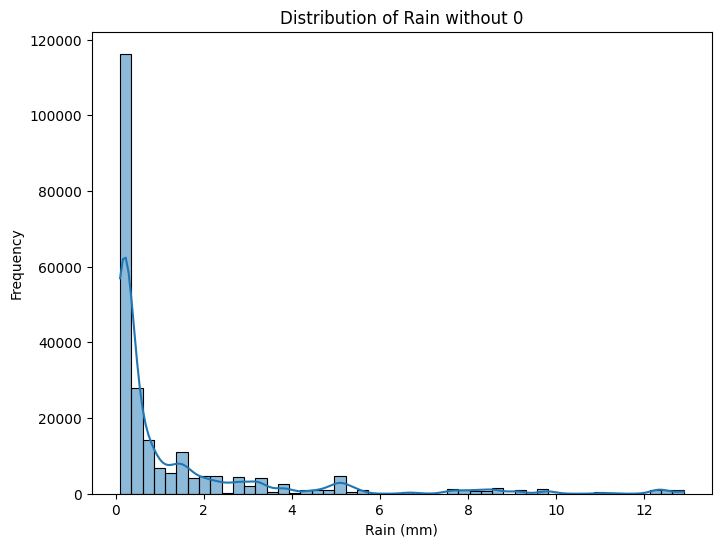

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df[merged_df['rain (mm)']>0]['rain (mm)'], bins=50, kde=True)
plt.title('Distribution of Rain without 0')
plt.xlabel('Rain (mm)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
merged_df.to_csv('final.csv',index=False)

In [ ]:
merged_df

,start_station_name,date,time,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),lat,lng,busyness,busyness_encoded,time_seconds,date_ordinal,day_of_week
0,Central Ave & Woodbine St,11-11,20:00:00,10.9,0.0,16.7,40.692887,-73.915952,Not Busy,1,72000.0,693910,7
1,Bus Slip & State St,11-11,20:00:00,10.9,0.0,16.7,40.701758,-74.013922,Not Busy,1,72000.0,693910,7
2,Church St & Worth St,11-11,20:00:00,10.9,0.0,16.7,40.716658,-74.006215,Not Busy,1,72000.0,693910,7
3,Amsterdam Ave & W 152 St,11-11,20:00:00,10.9,0.0,16.7,40.829402,-73.944366,Not Busy,1,72000.0,693910,7
4,30 Ave & 21 St,11-11,20:00:00,10.9,0.0,16.7,40.770423,-73.928683,Not Busy,1,72000.0,693910,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202728,Hancock St & Bedford Ave,10-06,08:00:00,18.1,0.0,9.3,40.682127,-73.953860,Not Too Busy,2,28800.0,693874,6
202729,Huron St & Franklin St,10-06,08:00:00,18.1,0.0,9.3,40.732661,-73.958281,Not Too Busy,2,28800.0,693874,6
202730,Grand Concourse & E Mount Eden Ave,10-06,08:00:00,18.1,0.0,9.3,40.843145,-73.911749,Not Too Busy,2,28800.0,693874,6
202731,E 12 St & 3 Ave,10-06,08:00:00,18.1,0.0,9.3,40.732255,-73.988774,Not Too Busy,2,28800.0,693874,6


In [ ]:
merged_df['temperature_2m (°C)'].mode()

,temperature_2m (°C)
0,7.4


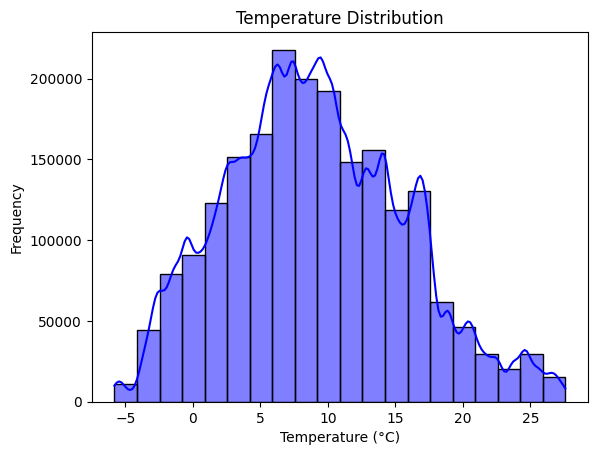

In [ ]:
sns.histplot(df['temperature_2m (°C)'], bins=20, kde=True, color='blue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

In [ ]:
merged_df['rain (mm)'].nunique()

59

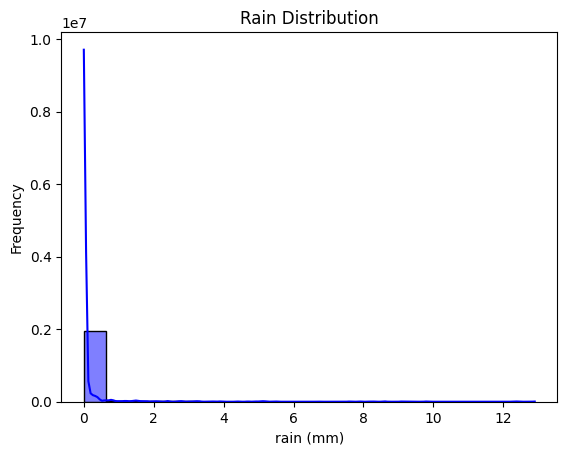

In [ ]:
sns.histplot(df['rain (mm)'], bins=20, kde=True, color='blue')
plt.xlabel('rain (mm)')
plt.ylabel('Frequency')
plt.title('Rain Distribution')
plt.show()

In [ ]:
merged_df['wind_speed_10m (km/h)'].nunique()

279

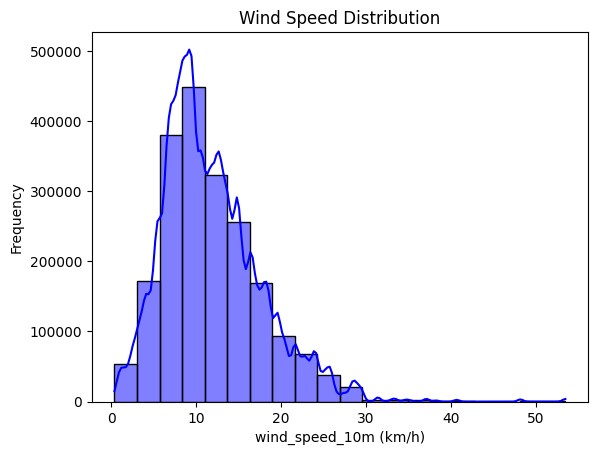

In [ ]:
sns.histplot(df['wind_speed_10m (km/h)'], bins=20, kde=True, color='blue')
plt.xlabel('wind_speed_10m (km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.show()

In [ ]:
merged_df['lat'].nunique()

2199

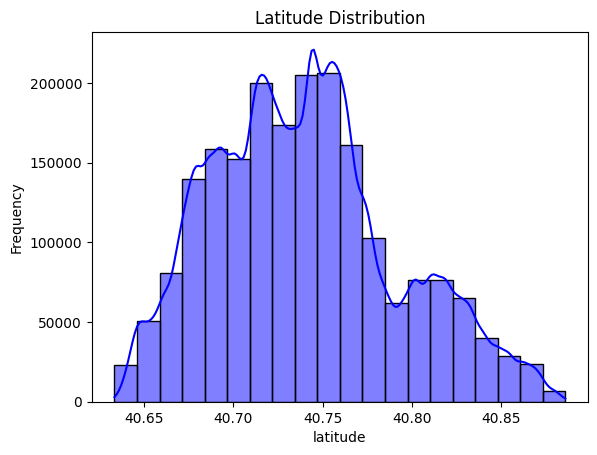

In [ ]:
sns.histplot(merged_df['lat'], bins=20, kde=True, color='blue')
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.title('Latitude Distribution')
plt.show()

In [ ]:
merged_df['lng'].nunique()

2197

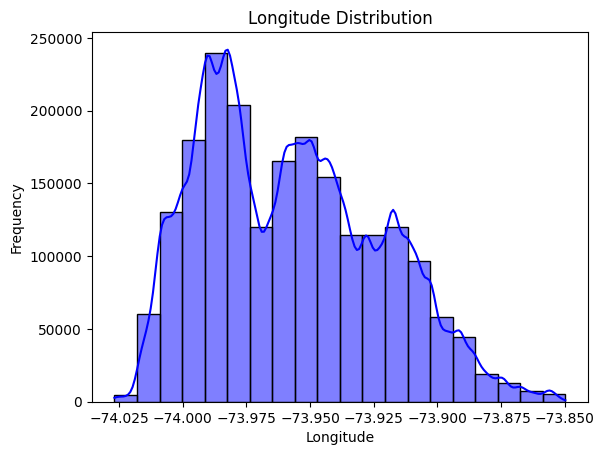

In [ ]:
sns.histplot(merged_df['lng'], bins=20, kde=True, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Longitude Distribution')
plt.show()

In [ ]:
merged_df['time'].nunique()

24

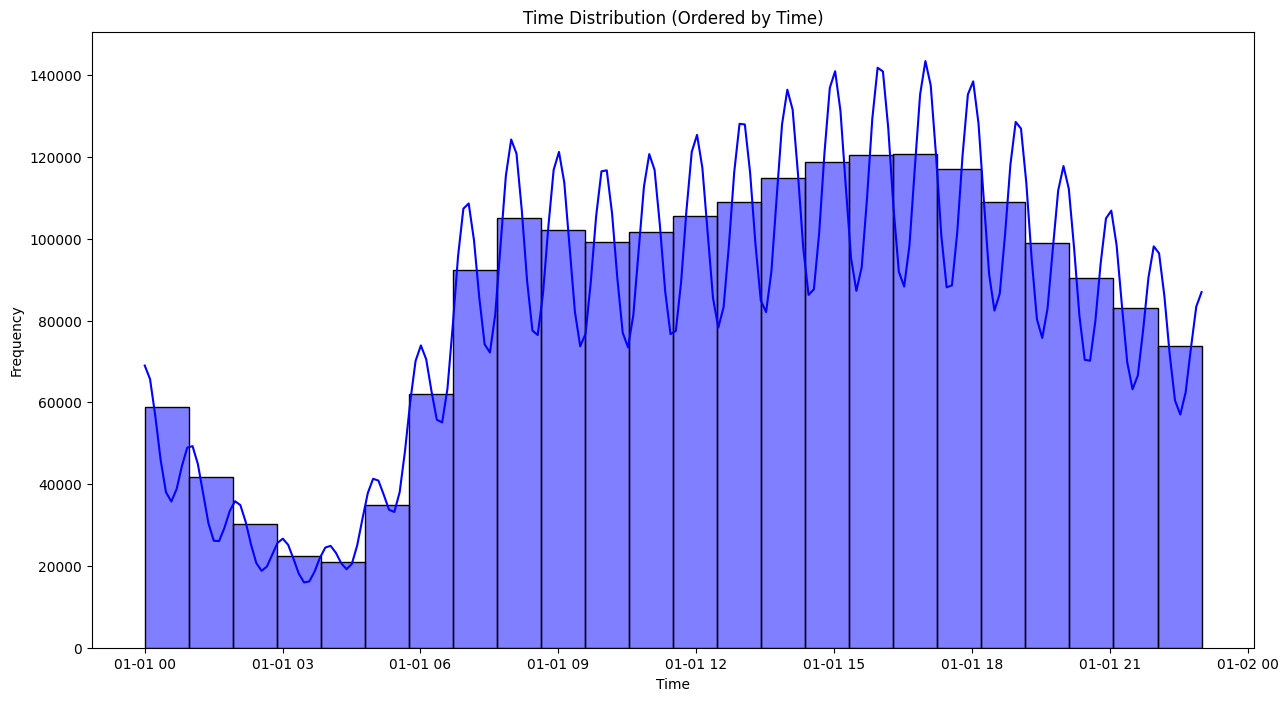

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
merged_df['time'] = pd.to_datetime(merged_df['time'], format='%H:%M:%S')
merged_df = merged_df.sort_values('time')
plt.figure(figsize=(15, 8))
sns.histplot(merged_df['time'], bins=24, kde=True, color='blue')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution (Ordered by Time)')

# Show the plot
plt.show()


In [ ]:
merged_df['day_of_week'].nunique()

7

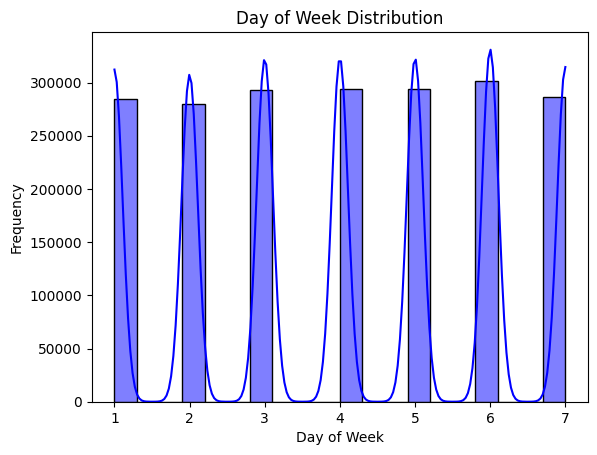

In [ ]:
sns.histplot(merged_df['day_of_week'], bins=20, kde=True, color='blue')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Day of Week Distribution')
plt.show()

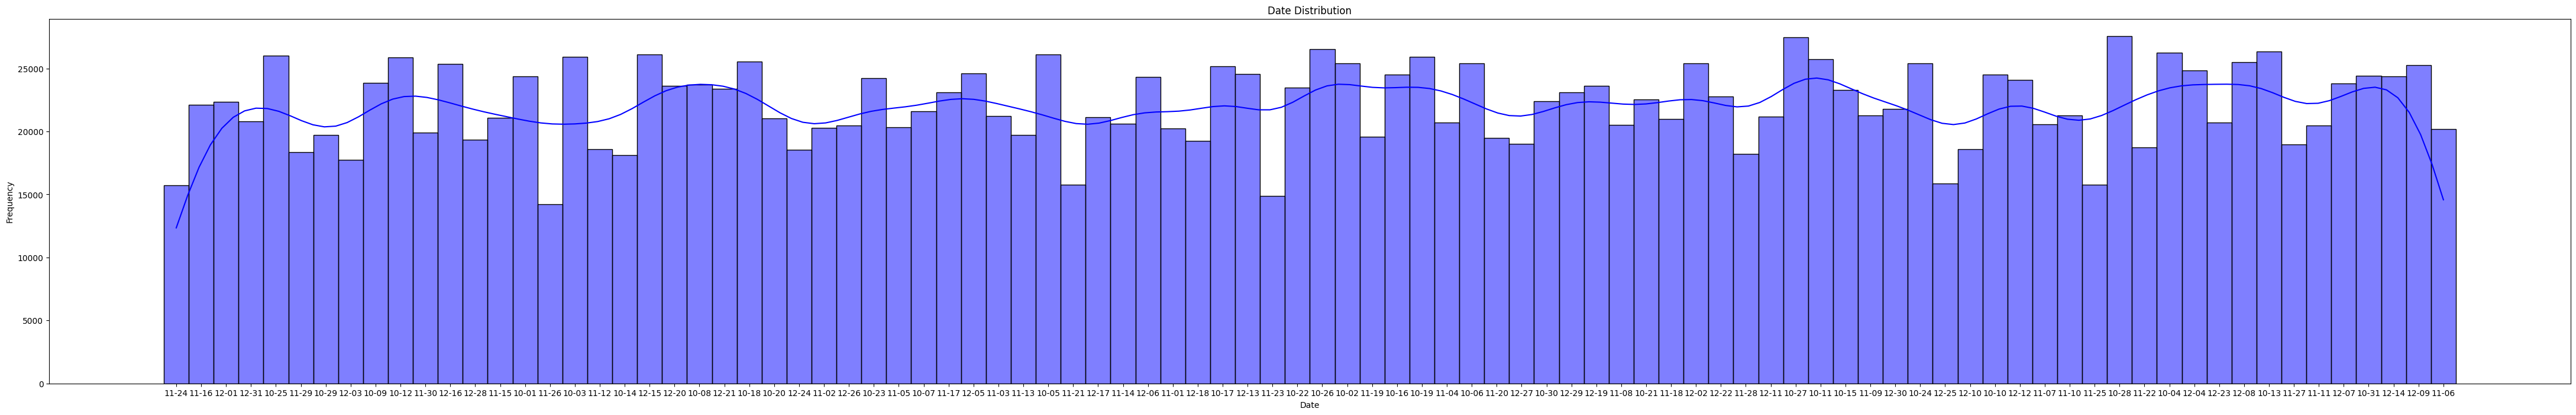

In [ ]:
plt.figure(figsize=(55, 8))
sns.histplot(merged_df['date'], bins=92, kde=True, color='blue')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Date Distribution')
plt.show()

In [ ]:
merged_df['date'].nunique()

92

In [ ]:
type(merged_df['date'].iloc[0])

str

In [ ]:
merged_df

,start_station_name,date,time,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),lat,lng,busyness,busyness_encoded,time_seconds,date_ordinal,day_of_week
104052,E Houston St & Columbia St,11-24,1900-01-01 00:00:00,6.4,0.0,12.8,40.719632,-73.978448,Not Busy,1,0.0,693923,6
53140,Central Park W & W 91 St,11-16,1900-01-01 00:00:00,6.5,0.0,11.0,40.788602,-73.966775,Not Busy,1,0.0,693915,5
53141,Central Ave & Flushing Ave,11-16,1900-01-01 00:00:00,6.5,0.0,11.0,40.702756,-73.933147,Not Busy,1,0.0,693915,5
53142,Central Ave & Woodbine St,11-16,1900-01-01 00:00:00,6.5,0.0,11.0,40.692887,-73.915952,Not Busy,1,0.0,693915,5
53143,DeKalb Ave & Franklin Ave,11-16,1900-01-01 00:00:00,6.5,0.0,11.0,40.690608,-73.957522,Not Busy,1,0.0,693915,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75523,W 56 St & 10 Ave,10-11,1900-01-01 23:00:00,14.0,0.0,7.4,40.768390,-73.989021,Very Busy,4,82800.0,693879,4
75522,Washington Square E,10-11,1900-01-01 23:00:00,14.0,0.0,7.4,40.730373,-73.995940,Busy,3,82800.0,693879,4
75521,Greenwich Ave & Charles St,10-11,1900-01-01 23:00:00,14.0,0.0,7.4,40.735098,-74.000176,Busy,3,82800.0,693879,4
43322,60 Pl & Bleecker St,10-01,1900-01-01 23:00:00,20.1,0.0,10.8,40.711114,-73.902957,Not Busy,1,82800.0,693869,1


<Axes: ylabel='lat'>

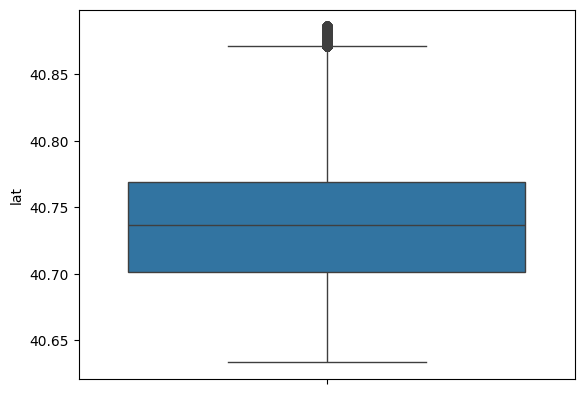

In [ ]:
sns.boxplot(merged_df['lat'])

<Axes: ylabel='lng'>

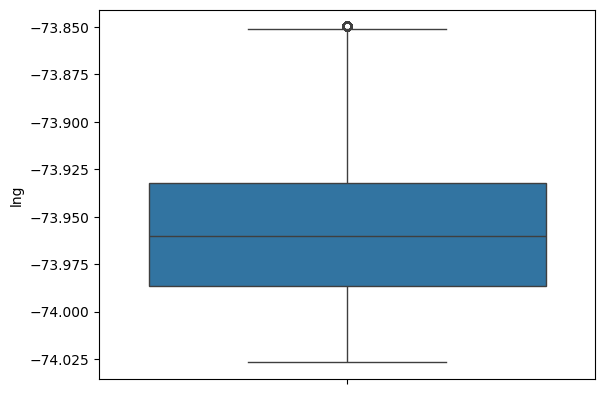

In [ ]:
sns.boxplot(merged_df['lng'])

<Axes: ylabel='time'>

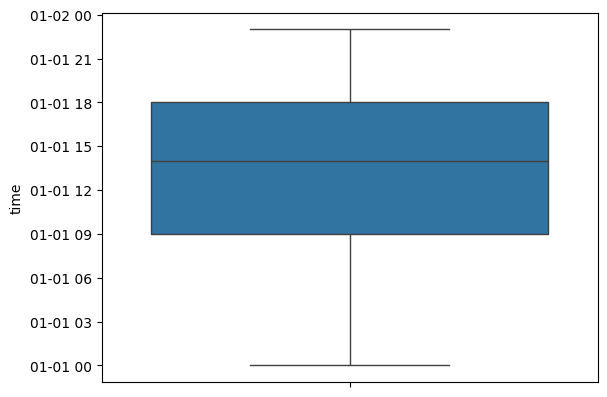

In [ ]:
sns.boxplot(merged_df['time'])

<Axes: ylabel='date'>

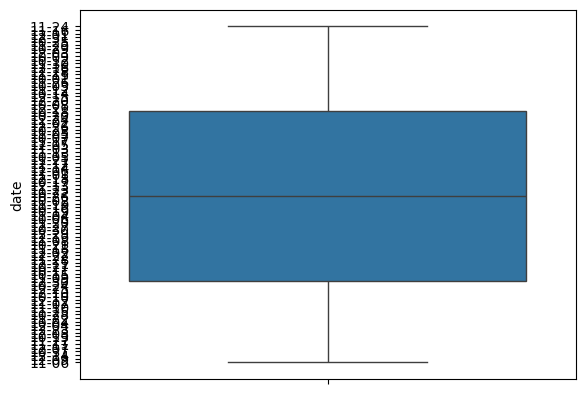

In [ ]:
sns.boxplot(merged_df['date'])

<Axes: ylabel='day_of_week'>

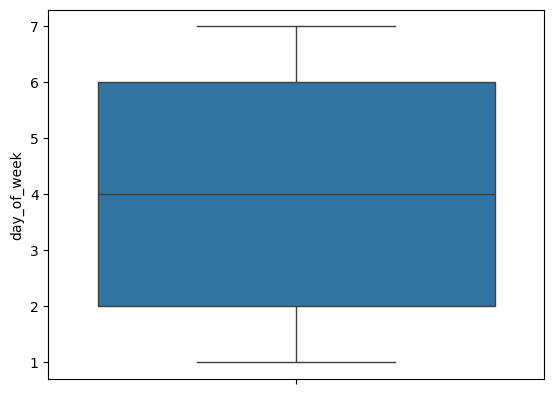

In [ ]:
sns.boxplot(merged_df['day_of_week'])

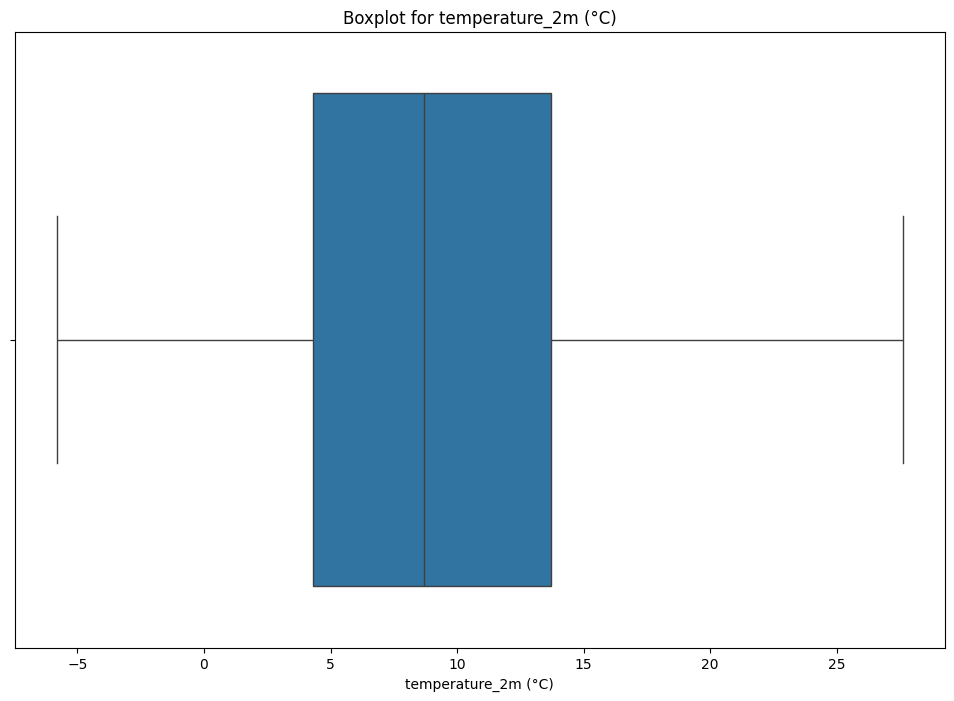

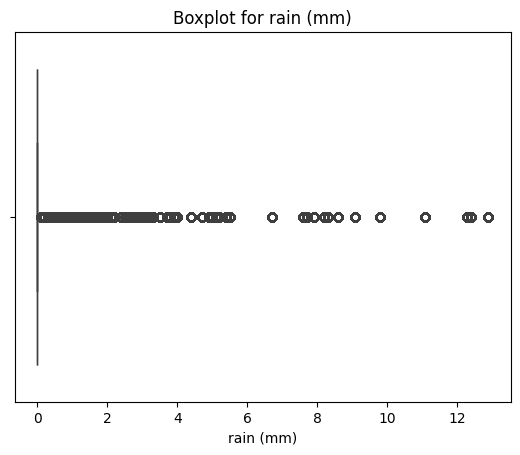

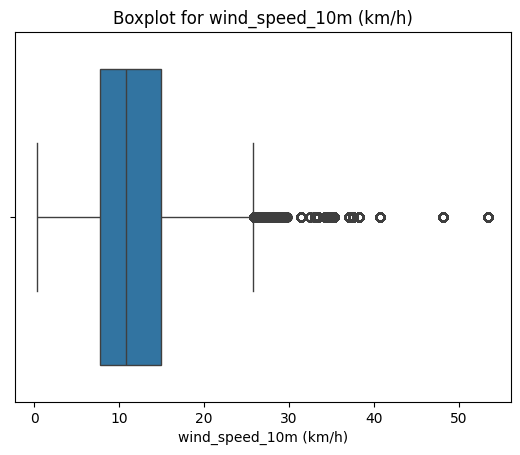

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
variables = ['temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)']
plt.figure(figsize=(12, 8))
for variable in variables:
    sns.boxplot(x=merged_df[variable])
    plt.title(f'Boxplot for {variable}')
    plt.show()

In [ ]:
import pandas as pd

def count_outliers(df, columns):
    outlier_counts = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

features = ['temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)',
            'lat', 'lng', 'time', 'day_of_week']

# Calculate and print the number of outliers for each feature
outliers = count_outliers(merged_df, features)
for feature, count in outliers.items():
    print(f"{feature}: {count} outliers")

temperature_2m (°C): 0 outliers
rain (mm): 230499 outliers
wind_speed_10m (km/h): 39819 outliers
lat: 10233 outliers
lng: 137 outliers
time: 0 outliers
day_of_week: 0 outliers


In [ ]:
len(df[(df['rain (mm)'] > 6)])

11502

In [ ]:
merged_df = merged_df[merged_df['rain (mm)'] <= 6]

In [ ]:
merged_df = merged_df[merged_df['wind_speed_10m (km/h)'] <= 40]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

final = merged_df.copy()
final[['rain (mm)', 'wind_speed_10m (km/h)', 'lng', 'time_seconds', 'date_ordinal', 'day_of_week']] = min_max_scaler.fit_transform(final[['rain (mm)', 'wind_speed_10m (km/h)', 'lng', 'time_seconds', 'date_ordinal', 'day_of_week']])
final[['temperature_2m (°C)', 'wind_speed_10m (km/h)', 'lat']] = standard_scaler.fit_transform(final[['temperature_2m (°C)', 'wind_speed_10m (km/h)', 'lat']])

final

,start_station_name,date,time,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),lat,lng,busyness,busyness_encoded,time_seconds,date_ordinal,day_of_week
104052,E Houston St & Columbia St,11-24,1900-01-01 00:00:00,-0.398936,0.0,0.190061,-0.395581,0.273010,Not Busy,1,0.0,0.593407,0.833333
53140,Central Park W & W 91 St,11-16,1900-01-01 00:00:00,-0.383865,0.0,-0.130750,0.942409,0.338980,Not Busy,1,0.0,0.505495,0.666667
53141,Central Ave & Flushing Ave,11-16,1900-01-01 00:00:00,-0.383865,0.0,-0.130750,-0.722950,0.529031,Not Busy,1,0.0,0.505495,0.666667
53142,Central Ave & Woodbine St,11-16,1900-01-01 00:00:00,-0.383865,0.0,-0.130750,-0.914412,0.626208,Not Busy,1,0.0,0.505495,0.666667
53143,DeKalb Ave & Franklin Ave,11-16,1900-01-01 00:00:00,-0.383865,0.0,-0.130750,-0.958619,0.391273,Not Busy,1,0.0,0.505495,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75523,W 56 St & 10 Ave,10-11,1900-01-01 23:00:00,0.746445,0.0,-0.772370,0.550296,0.213251,Very Busy,4,1.0,0.109890,0.500000
75522,Washington Square E,10-11,1900-01-01 23:00:00,0.746445,0.0,-0.772370,-0.187208,0.174151,Busy,3,1.0,0.109890,0.500000
75521,Greenwich Ave & Charles St,10-11,1900-01-01 23:00:00,0.746445,0.0,-0.772370,-0.095535,0.150209,Busy,3,1.0,0.109890,0.500000
43322,60 Pl & Bleecker St,10-01,1900-01-01 23:00:00,1.665763,0.0,-0.166395,-0.560827,0.699652,Not Busy,1,1.0,0.000000,0.000000


In [ ]:
final=final[['temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)',
            'lat', 'lng', 'date_ordinal', 'time_seconds', 'date_ordinal', 'busyness_encoded']]

In [ ]:
final

,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),lat,lng,date_ordinal,time_seconds,date_ordinal,busyness_encoded
104052,-0.398936,0.0,0.190061,-0.395581,0.273010,0.593407,0.0,0.593407,1
53140,-0.383865,0.0,-0.130750,0.942409,0.338980,0.505495,0.0,0.505495,1
53141,-0.383865,0.0,-0.130750,-0.722950,0.529031,0.505495,0.0,0.505495,1
53142,-0.383865,0.0,-0.130750,-0.914412,0.626208,0.505495,0.0,0.505495,1
53143,-0.383865,0.0,-0.130750,-0.958619,0.391273,0.505495,0.0,0.505495,1
...,...,...,...,...,...,...,...,...,...
75523,0.746445,0.0,-0.772370,0.550296,0.213251,0.109890,1.0,0.109890,4
75522,0.746445,0.0,-0.772370,-0.187208,0.174151,0.109890,1.0,0.109890,3
75521,0.746445,0.0,-0.772370,-0.095535,0.150209,0.109890,1.0,0.109890,3
43322,1.665763,0.0,-0.166395,-0.560827,0.699652,0.000000,1.0,0.000000,1


In [ ]:
final.describe()

,temperature_2m (°C),rain (mm),wind_speed_10m (km/h),lat,lng,date_ordinal,time_seconds,date_ordinal,busyness_encoded
count,2.021477e+06,2.021477e+06,2.021477e+06,2.021371e+06,2.021371e+06,2.021477e+06,2.021477e+06,2.021477e+06,2.021477e+06
mean,-5.230273e-17,1.744950e-02,7.537779e-16,4.644778e-13,3.913866e-01,4.842282e-01,5.771604e-01,4.842282e-01,2.038655e+00
std,1.000000e+00,8.884438e-02,1.000000e+00,1.000000e+00,1.968783e-01,2.965751e-01,2.605810e-01,2.965751e-01,1.032510e+00
min,-2.237573e+00,0.000000e+00,-2.019965e+00,-2.070771e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,-7.154227e-01,0.000000e+00,-7.010789e-01,-7.561894e-01,2.273436e-01,2.197802e-01,3.913043e-01,2.197802e-01,1.000000e+00
50%,-5.230762e-02,0.000000e+00,-1.842179e-01,-6.302898e-02,3.753566e-01,4.725275e-01,6.086957e-01,4.725275e-01,2.000000e+00
75%,6.861615e-01,0.000000e+00,5.821621e-01,5.659176e-01,5.339121e-01,7.472527e-01,7.826087e-01,7.472527e-01,3.000000e+00
max,2.796073e+00,1.000000e+00,4.734873e+00,2.835733e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021477 entries, 104052 to 72243
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   temperature_2m (°C)    float64
 1   rain (mm)              float64
 2   wind_speed_10m (km/h)  float64
 3   lat                    float64
 4   lng                    float64
 5   date_ordinal           float64
 6   time_seconds           float64
 7   date_ordinal           float64
 8   busyness_encoded       int64  
dtypes: float64(8), int64(1)
memory usage: 154.2 MB


In [ ]:
final_reduced = final.sample(n=400000, random_state=42)
print("New shape of the dataset:", final_reduced.shape)

New shape of the dataset: (400000, 9)


In [ ]:
from sklearn.model_selection import train_test_split

# Stratified sampling based on the target variable
final_reduced, _ = train_test_split(final, train_size=400000/4000000, stratify=final['busyness_encoded'], random_state=42)

<Axes: xlabel='busyness_encoded', ylabel='Count'>

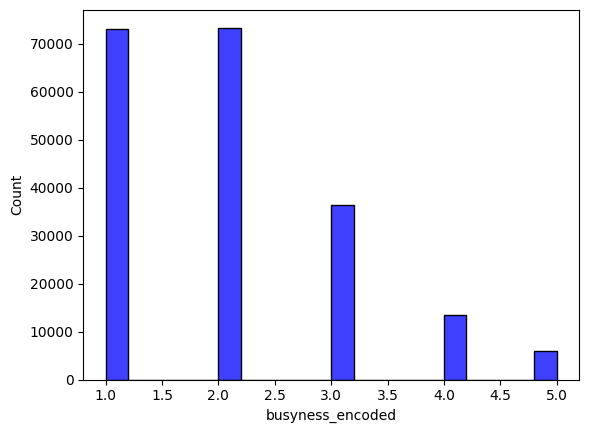

In [ ]:
sns.histplot(final_reduced['busyness_encoded'], bins=20, color='blue')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# Features and target
X = final_reduced[['temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)', 'lat', 'lng',
                   'date_ordinal', 'time_seconds']]
y = final_reduced['busyness_encoded']

# Drop NaN values
data_cleaned = pd.concat([X, y], axis=1).dropna()

# Separate features and target
X_cleaned = data_cleaned[['temperature_2m (°C)', 'rain (mm)', 'lat', 'lng',
                          'date_ordinal', 'time_seconds']]
y_cleaned = data_cleaned['busyness_encoded']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, max_depth=30, min_samples_leaf=5, random_state=42)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=4, min_samples_split=10, n_estimators=180, random_state=42)
scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1_weighted')  # cv=5 לחמישה folds
print("Cross-Validation f1-weighted:", scores.mean())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation f1-weighted: 0.6514565501876731
Evaluation on Test Set:
Accuracy: 0.50
Weighted F1-Score: 0.49
Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.65      0.63     14527
           2       0.46      0.51      0.49     14805
           3       0.39      0.36      0.38      7270
           4       0.36      0.16      0.22      2693
           5       0.47      0.23      0.31      1131

    accuracy                           0.50     40426
   macro avg       0.46      0.38      0.40     40426
weighted avg       0.49      0.50      0.49     40426



In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
model1 = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=4, min_samples_split=10, n_estimators=180, random_state=42)
model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")

# Ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', model), ('xgb', model2)], voting='soft')

# Fit ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = ensemble_model.predict(X_test_scaled)

# Evaluation
print("Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:34:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation on Test Set:
Accuracy: 0.52
Weighted F1-Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.66      0.64     14527
           2       0.47      0.54      0.50     14805
           3       0.40      0.37      0.39      7270
           4       0.39      0.12      0.19      2693
           5       0.58      0.30      0.40      1131

    accuracy                           0.52     40426
   macro avg       0.49      0.40      0.42     40426
weighted avg       0.51      0.52      0.51     40426



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# שינוי הערכים של y כך שיתחילו מ-0
y_cleaned_transformed = y_cleaned - 1

# פיצול הנתונים
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned_transformed, test_size=0.2, random_state=42)

# המרה למבנה numpy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# הגדרת המודל ואימון
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# ניבוי על סט הבדיקה
y_pred = model.predict(X_test)

# הערכת הביצועים
print(f"Weighted F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
from sklearn.svm import SVC


Weighted F1-Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64     14527
           1       0.47      0.55      0.51     14805
           2       0.40      0.37      0.38      7270
           3       0.40      0.11      0.17      2693
           4       0.57      0.34      0.42      1131

    accuracy                           0.52     40426
   macro avg       0.49      0.40      0.43     40426
weighted avg       0.51      0.52      0.51     40426



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # You can adjust kernel, C, and gamma for better performance

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Evaluation on Test Set:
Accuracy: 0.46
Weighted F1-Score: 0.42
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59     14527
           1       0.39      0.63      0.48     14805
           2       0.33      0.11      0.16      7270
           3       0.00      0.00      0.00      2693
           4       0.00      0.00      0.00      1131

    accuracy                           0.46     40426
   macro avg       0.26      0.27      0.25     40426
weighted avg       0.42      0.46      0.42     40426



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter distributions
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [5, 10, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 180}
Best Score: 0.499839211508458


In [ ]:
print("Duplicate columns in `final`:", final.columns[final.columns.duplicated()])
print("Duplicate columns in `final_reduced`:", final_reduced.columns[final_reduced.columns.duplicated()])

Duplicate columns in `final`: Index(['date_ordinal'], dtype='object')
Duplicate columns in `final_reduced`: Index(['date_ordinal'], dtype='object')


In [ ]:
# Remove duplicate columns
final = final.loc[:, ~final.columns.duplicated()]
final_reduced = final_reduced.loc[:, ~final_reduced.columns.duplicated()]

In [ ]:
# Specify the unique columns for merging
key_columns = ['temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)',
               'lat', 'lng', 'date_ordinal', 'time_seconds', 'busyness_encoded']

# Perform the merge
final_not_in_reduced = pd.merge(
    final,
    final_reduced,
    on=key_columns,
    how='outer',
    indicator=True
).query('_merge == "left_only"').drop('_merge', axis=1)

# Randomly sample 400,000 rows
test_data = final_not_in_reduced.sample(n=400000, random_state=42)

In [ ]:
# Drop rows with missing values
test_data_cleaned = test_data.dropna()

# Features and target
X_cleaned = test_data_cleaned[['temperature_2m (°C)', 'rain (mm)', 'wind_speed_10m (km/h)', 'lat', 'lng', 'date_ordinal', 'time_seconds']]
y_cleaned = test_data_cleaned['busyness_encoded']

# Predict with the ensemble model
y_pred = ensemble_model.predict(X_cleaned)

# Evaluate the model
print("Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_cleaned, y_pred):.2f}")
print(f"Weighted F1-Score: {f1_score(y_cleaned, y_pred, average='weighted'):.2f}")
print("Classification Report:")
print(classification_report(y_cleaned, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Evaluation on Test Set:
Accuracy: 0.36
Weighted F1-Score: 0.33
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.42      0.42    144641
           2       0.36      0.52      0.43    144858
           3       0.19      0.10      0.13     72259
           4       0.01      0.00      0.00     26562
           5       0.02      0.00      0.01     11659

    accuracy                           0.36    399979
   macro avg       0.20      0.21      0.20    399979
weighted avg       0.32      0.36      0.33    399979



<Axes: xlabel='busyness_encoded', ylabel='Count'>

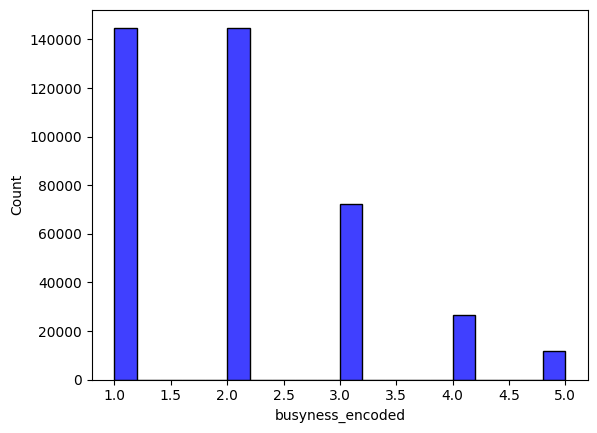

In [ ]:
sns.histplot(test_data_cleaned['busyness_encoded'], bins=20, color='blue')